In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
def apply_mask(img, mask):
    dft = cv2.dft(img, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

def plot_ax(ax, img, title):
    ax.imshow(img, cmap = 'gray')
    ax.set_title(title)
    ax.axis('off')

def plot_filters(img, radio = 30):
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))
    axs = axs.ravel()
    count = 0
    rows, cols = img.shape
    crow,ccol = int(rows/2) , int(cols/2)
    for i in range(2):
        mask = np.zeros((rows, cols, 2), np.uint8)
        if i == 0: cv2.circle(mask, (crow, ccol), radio, 1, -1)
        else: mask[crow-radio:crow+radio, ccol-radio:ccol+radio] = 1
        plot_ax(axs[count], mask[:,:,0], 'Low Pass Mask')
        count += 1
        img_back = apply_mask(img, mask)
        plot_ax(axs[count], img_back, 'Low Pass Filtered')
        count += 1
        mask = 1 - mask
        plot_ax(axs[count], mask[:,:,0], 'High Pass Mask')
        count += 1
        img_back = apply_mask(img, mask)
        plot_ax(axs[count], img_back, 'High Pass Filtered')
        count += 1
    plt.show()
    return

def plot_frecuency_domain(img):
    dft = cv2.dft(img, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 2 * np.log(1 + cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

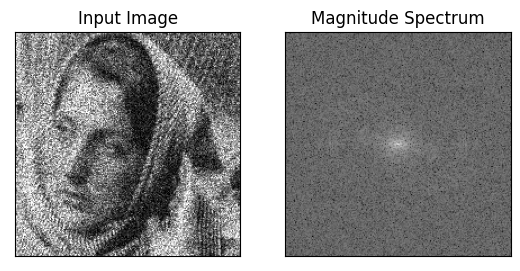

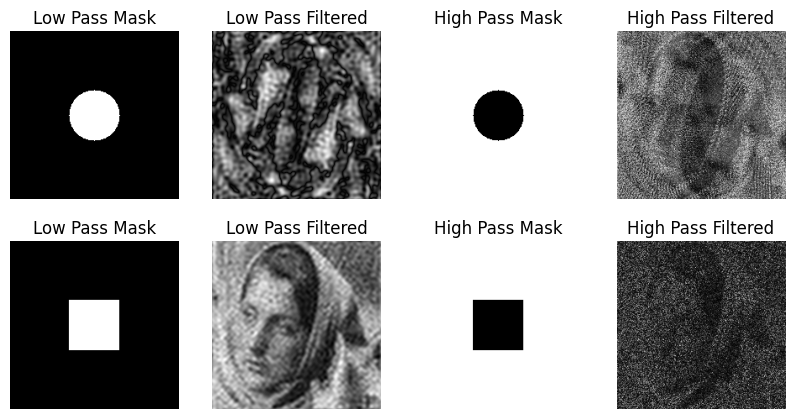

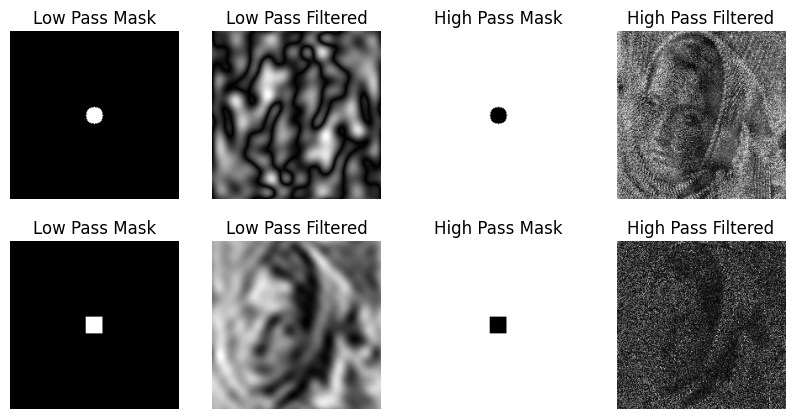

In [4]:
img = cv2.imread('images/noisy.png',0)
img = np.float32(img)
plot_frecuency_domain(img)
plot_filters(img)
plot_filters(img, 10)

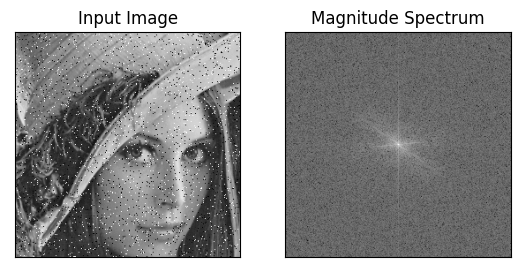

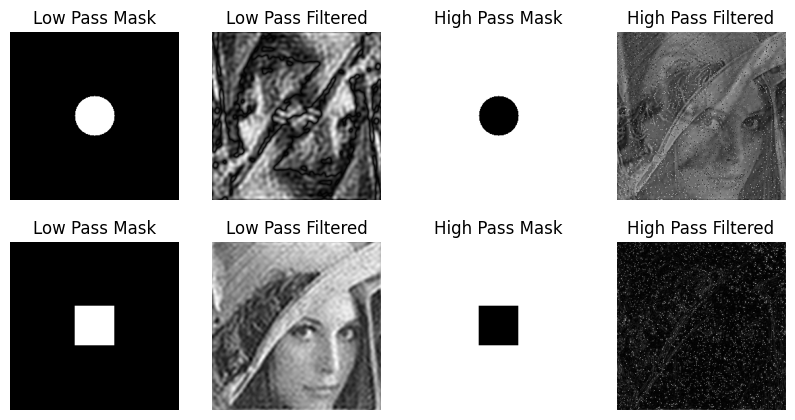

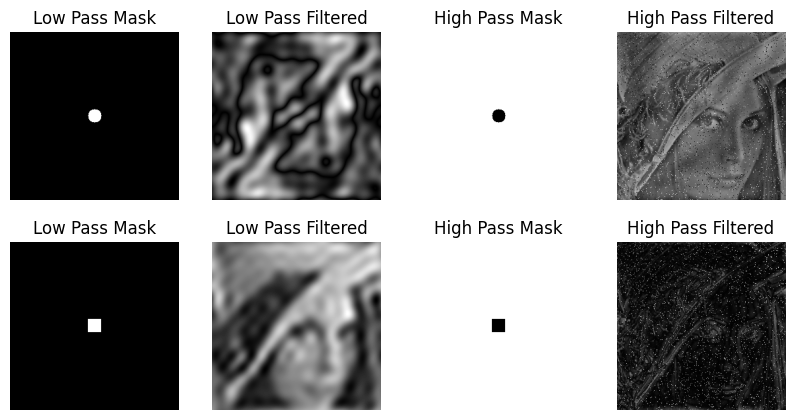

In [5]:
img_lena = cv2.imread('images/noisy_lena.png',0)
img_lena = np.float32(img_lena)
plot_frecuency_domain(img_lena)
plot_filters(img_lena)
plot_filters(img_lena, 10)

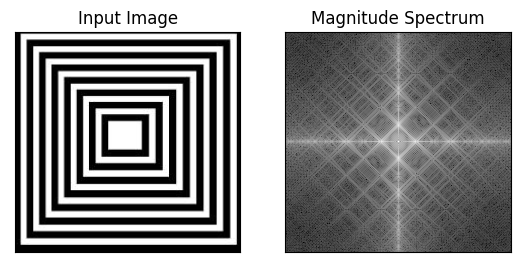

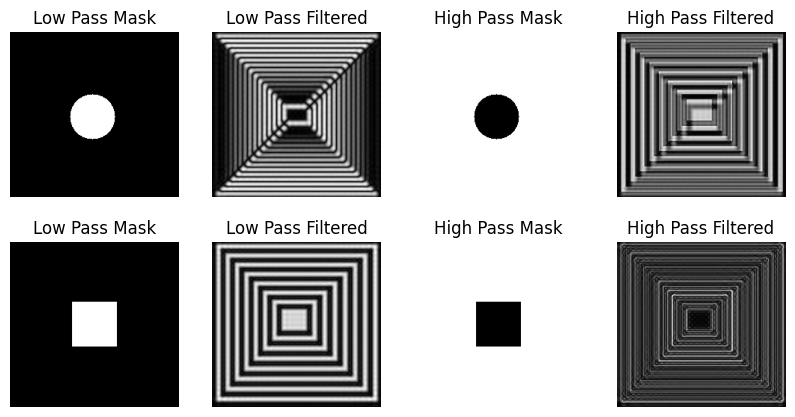

In [6]:
img_test_1 = cv2.imread('images/test_im_1.png',0)
img_test_1 = np.float32(img_test_1)
plot_frecuency_domain(img_test_1)
plot_filters(img_test_1)

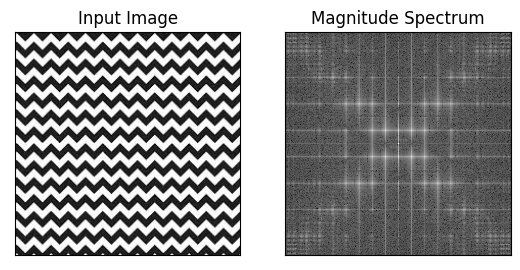

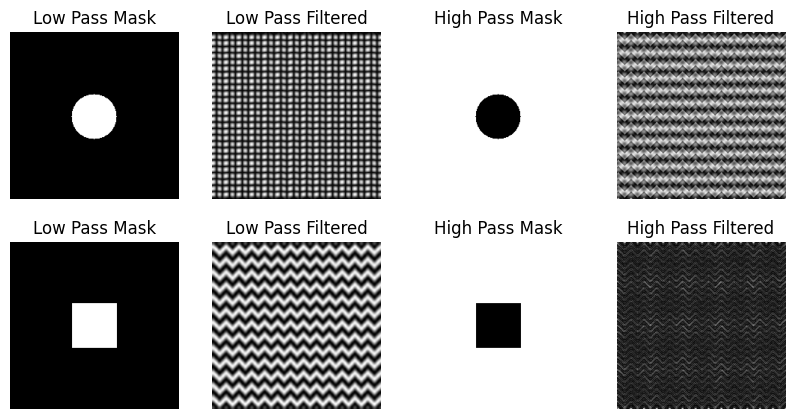

In [7]:
img_test_2 = cv2.imread('images/test_im_2.png',0)
img_test_2 = np.float32(img_test_2)
plot_frecuency_domain(img_test_2)
plot_filters(img_test_2)

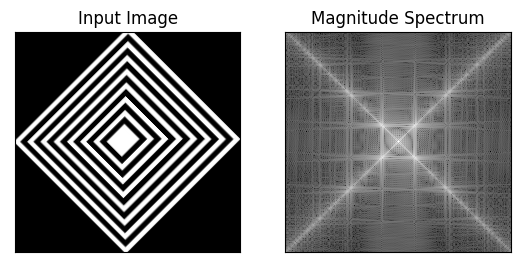

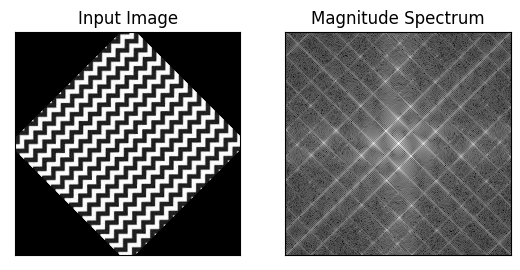

In [13]:
# Plot img_test_1 and img_test_2 rotated 45 degrees
# Scale both images to 0.6
img_test_1_rot = cv2.warpAffine(img_test_1, cv2.getRotationMatrix2D((img_test_1.shape[1]/2, img_test_1.shape[0]/2), 45, 0.75), (img_test_1.shape[1], img_test_1.shape[0]))
img_test_2_rot = cv2.warpAffine(img_test_2, cv2.getRotationMatrix2D((img_test_2.shape[1]/2, img_test_2.shape[0]/2), 45, 0.75), (img_test_2.shape[1], img_test_2.shape[0]))
plot_frecuency_domain(img_test_1_rot)
plot_frecuency_domain(img_test_2_rot)